<a href="https://colab.research.google.com/github/satomin0718/pictresize/blob/main/%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 回帰分析

In [ ]:
#１ ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

データを読み込みます。  

データ内容は以下の通り  

ID：ID  
sales：売上個数  
insta_post：Instagram投稿数  
insta_good：Instagramいいね！数  
flyer：チラシ配布枚数  
event：イベントあり＝１、イベントなし＝０  
new_item：新作発売日＝１  
holiday：土日祝＝１

In [ ]:
#2　データを読み込みます。
df = pd.read_csv("線形回帰.csv", index_col=0)
df.head()

,sales,insta_post,insta_good,flyer,event,new_item,holiday
ID,,,,,,,
1,62,0,20,0,0,0,0
2,60,0,24,0,0,0,0
3,104,0,26,0,0,0,0
4,102,0,22,0,0,0,0
5,178,0,39,0,0,0,1


### 単回帰分析

説明変数をinsta_good、目的変数をsalesとして、単回帰分析を行います。

In [ ]:
#3 説明変数insta_good
X = df.iloc[:, 2].values
X = X.reshape(-1,1)

# 目的変数sales
Y = df.iloc[:, 0].values

In [ ]:
#4 sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

# 予測モデルを作成
clf.fit(X, Y)

# 回帰係数
print(clf.coef_)

# 切片
print(clf.intercept_)

# 決定係数
print(clf.score(X, Y))

[2.05852128]
101.71515440413765
0.5218980221448157


insta_goodの回帰係数と、単回帰の式の切片が分かりました。  
決定係数は、0～1の範囲の値をとり、値が大きいほどモデルが適切にデータを表現できているといえます。

### 重回帰分析

insta_post以降6カラムを説明変数、目的変数をsalesとして、重回帰分析を行います。

In [ ]:
#5 説明変数
X = df.iloc[:, 1:7].values

# 目的変数
Y = df.iloc[:, 0].values

In [ ]:
#6 予測モデルを作成
clf.fit(X, Y)

# 偏回帰係数
df_except_sales = df.iloc[:, 1:7]
print(pd.DataFrame({"Name":df_except_sales.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients'))

# 切片
print(clf.intercept_)

         Name  Coefficients
2       flyer      0.206098
1  insta_good      0.684993
5     holiday     26.549665
4    new_item     38.905751
0  insta_post     48.871107
3       event    245.436745
131.89410662096915


各変数の偏回帰係数と重回帰の式の切片が分かりました。

各変数がどの程度目的変数に影響しているかを確認するには、各変数を正規化します。

In [ ]:
#7 データフレームの各列を正規化
df2 = df.apply(lambda x: (x - np.mean(x)) / np.std(x))
df2.head()

,sales,insta_post,insta_good,flyer,event,new_item,holiday
ID,,,,,,,
1,-1.427147,-0.322749,-0.839503,-0.511766,-0.138675,-0.19803,-0.657596
2,-1.447439,-0.322749,-0.723860,-0.511766,-0.138675,-0.19803,-0.657596
3,-1.001013,-0.322749,-0.666038,-0.511766,-0.138675,-0.19803,-0.657596
4,-1.021305,-0.322749,-0.781681,-0.511766,-0.138675,-0.19803,-0.657596
5,-0.250205,-0.322749,-0.290198,-0.511766,-0.138675,-0.19803,1.520691


In [ ]:
#8 説明変数
X = df2.iloc[:, 1:7].values

# 目的変数
Y = df2.iloc[:, 0].values

In [ ]:
#9 予測モデルを作成
clf.fit(X, Y)

# 偏回帰係数
df2_except_sales = df2.iloc[:, 1:7]
print(pd.DataFrame({"Name":df2_except_sales.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients'))

# 切片
print(clf.intercept_)

         Name  Coefficients
4    new_item      0.075220
5     holiday      0.123663
0  insta_post      0.144937
1  insta_good      0.240394
3       event      0.338815
2       flyer      0.424020
2.58448429859836e-17


各変数の偏回帰係数と重回帰の式の切片が分かりました。

正規化した偏回帰係数によって、売上個数に影響を与えている変数を確認することができます。

### 線形回帰（教師あり学習）

学習用データとテストデータを用いて、線形回帰（重回帰分析）を行います。  
先程、正規化したデータを使います。

In [ ]:
#10 説明変数
X = df2.iloc[:, 1:7].values

# 目的変数
Y = df2.iloc[:, 0].values

#学習用データとテスト用データを7:3に分割する
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
#11 予測モデルを作成
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

# 偏回帰係数
df2_except_sales = df2.iloc[:, 1:7]
print(pd.DataFrame({"Name":df2_except_sales.columns,
                    "Coefficients":model.coef_}).sort_values(by='Coefficients') )

# 切片
print(model.intercept_)

         Name  Coefficients
4    new_item     -0.053832
5     holiday      0.119065
0  insta_post      0.138968
1  insta_good      0.217962
3       event      0.354042
2       flyer      0.384938
0.05174463196791154


学習データにおける各変数の偏回帰係数と重回帰の式の切片が分かりました。  

予測値と実測値の平均二乗誤差を求めてみます。  
また、残差プロット（横軸に予測値、縦軸に実際の値との差をプロットしたもの）をプロットします。  
残差プロットは、y=0の水平線に近いほど、良い精度のデータといえます

In [ ]:
#12
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('X_trainを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((np.array(Y_train, dtype = int) - pred_train) ** 2)))
print('X_testを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean((np.array(Y_test, dtype = int) - pred_test) ** 2)))

X_trainを使ったモデルの平均二乗誤差＝0.33
X_testを使ったモデルの平均二乗誤差＝0.13


Text(0.5, 1.0, 'Residual Plots')

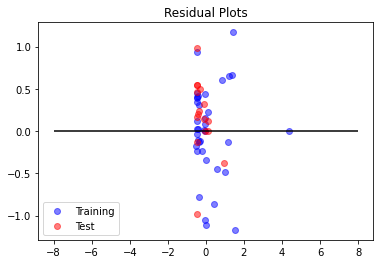

In [ ]:
#13 学習用データの残差プロット
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用データの残差プロット
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=-8,xmax=8)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')